In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [4]:
df=pd.read_csv('/content/ABHI.csv')
df.head()

project_name                      Smart contract address  \
0  Data Analytics    384571416209d08623c6ace9422613fc8970475d   
1  Data Analytics   0xAb5801a7D398351b8bE11C439e05C5B3259ae9B   
2  Data Analytics  0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db   
3  Data Analytics  0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB   
4  Data Analytics  0x617F2E2fD72FD9D5503197092aC168c91465E7f2   

                                      Blog post link  \
0  https://chainsecurity.com/security-audit/circl...   
1  https://stackoverflow.com/questions/75030483/w...   
2  https://stackoverflow.com/questions/71115106/s...   
3  https://stackoverflow.com/questions/75030483/w...   
4  https://stackoverflow.com/questions/69466137/h...   

                                       Audit website     Chain  \
0                          https://chainsecurity.com  Ethereum   
1  https://studygroup.moralis.io/t/compilation-er...  Ethereum   
2  https://ethereum.stackexchange.com/questions/1...  Ethereum   
3  https://studygroup.moralis.io/t/compilation-er...  Ethereum   
4  https://ethereum.stackexchange.com/questions/1...  Ethereum   

   Is_closed_source  hidden_owner  anti_whale_modifiable  Is_anti_whale  \
0             False         False                  False          False   
1             False         False                   True           True   
2              True         False                  False           True   
3              True         False                  False          False   
4              True         False                   True          False   

   Is_honeypot  ...  centralized_risk_high  centralized_risk_low  \
0        False  ...                  False                 False   
1        False  ...                  False                  True   
2        False  ...                  False                  True   
3         True  ...                  False                  True   
4         True  ...                  False                 False   

   event_setter  external_dependencies  immutable_states  \
0          True                   True              True   
1         False                   True             False   
2         False                   True             False   
3         False                  False              True   
4          True                   True             False   

   reentrancy_without_eth_transfer  incorrect_inheritance_order  \
0                             True                        False   
1                            False                         True   
2                            False                        False   
3                             True                        False   
4                             True                        False   

   shadowing_local  events_maths  \
0            False         False   
1            False          True   
2             True          True   
3            False          True   
4            False          True   

          Summary/rationale of risk tags marked true  
0  Bad Contract: Assigned for flaws that indicate...  
1  Summary/rationale of risk tags marked true: Th...  
2                                                NaN  
3                                                NaN  
4  The smart contract is marked with risks such a...  

[5 rows x 38 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                967 non-null    object
 1   Smart contract address                      967 non-null    object
 2   Blog post link                              967 non-null    object
 3   Audit website                               967 non-null    object
 4   Chain                                       967 non-null    object
 5   Is_closed_source                            967 non-null    bool  
 6   hidden_owner                                967 non-null    bool  
 7   anti_whale_modifiable                       967 non-null    bool  
 8   Is_anti_whale                               967 non-null    bool  
 9   Is_honeypot                                 967 non-null    bool  
 10  buy_tax                   

In [6]:
df['Smart contract address'].value_counts()

Smart contract address
384571416209d08623c6ace9422613fc8970475d      1
c7ed9f40a449cdfe213e2231f693a2fd7cb6e6e9      1
0xa9034f72655ae24703901d00f2904ea4834bb38a    1
d0fd40fa0f5cc32365e7a879f8e0479b7972f0a8      1
0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984    1
                                             ..
eeb1847df7d9d58029de37225dabf963bf1a65e6      1
f29f2b72f999d6b91785accfb84eafb371620214      1
: 0e95242dceab8815a44767f6ef2b20a693765e56    1
41cd2da8382225b5f6e5eebd5eafae9dc9ae1b85      1
695c7874d4ac8ffe6a454e9dd5c7fc6925189374      1
Name: count, Length: 967, dtype: int64

In [7]:
risk_columns=['Is_closed_source',	'hidden_owner',	'anti_whale_modifiable'	,
             'Is_anti_whale'	,'Is_honeypot',	'buy_tax',	'sell_tax','slippage_modifiable','Is_blacklisted',
              'can_take_back_ownership'	,'owner_change_balance'	,
              'is_airdrop_scam'	,'selfdestruct'	,'trust_list'	,'is_whitelisted',
              'is_fake_token'	,'illegal_unicode',	'exploitation',	'bad_contract',
              'reusing_state_variable'	,'encode_packed_collision',	'encode_packed_parameters',
              'centralized_risk_medium',	'centralized_risk_high',	'centralized_risk_low',	'event_setter',
              'external_dependencies','immutable_states',	'reentrancy_without_eth_transfer',
              'incorrect_inheritance_order',	'shadowing_local'	,'events_maths']



In [8]:
frequencies=df[risk_columns].apply(lambda x:x.value_counts()).loc[True]
frequencies=frequencies.fillna(0)
frequencies

Is_closed_source                   146
hidden_owner                       150
anti_whale_modifiable              112
Is_anti_whale                      138
Is_honeypot                         89
buy_tax                            117
sell_tax                           119
slippage_modifiable                139
Is_blacklisted                      76
can_take_back_ownership            181
owner_change_balance               204
is_airdrop_scam                     65
selfdestruct                       111
trust_list                         140
is_whitelisted                     106
is_fake_token                       87
illegal_unicode                     63
exploitation                       437
bad_contract                       348
reusing_state_variable             115
encode_packed_collision             80
encode_packed_parameters            81
centralized_risk_medium            254
centralized_risk_high              187
centralized_risk_low               170
event_setter                       140
external_dependencies              291
immutable_states                   145
reentrancy_without_eth_transfer    190
incorrect_inheritance_order         96
shadowing_local                     79
events_maths                       139
Name: True, dtype: int64

<ipython-input-9-95000c77f205>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


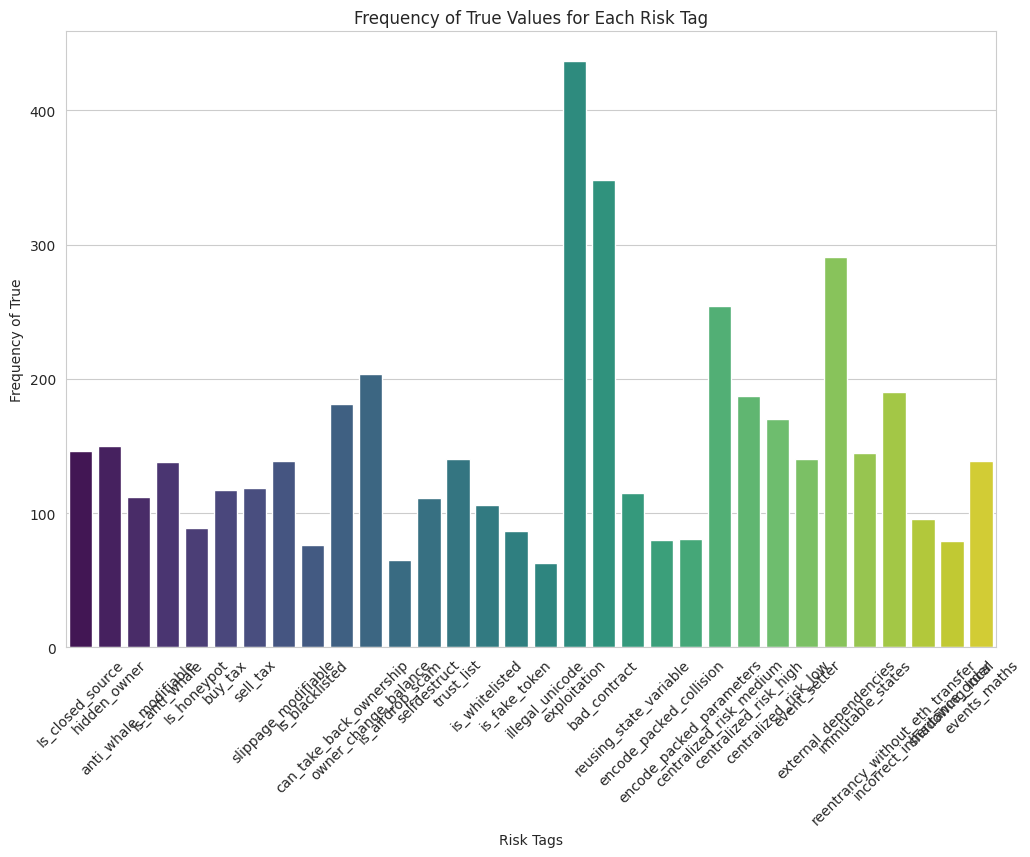

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=45)
plt.show()

In [10]:
def phi_coefficient(x,y):
  contingency_table = pd.crosstab(x,y)
  chi2=scipy.stats.chi2_contingency(contingency_table,correction=False)[0]
  n=np.sum(np.sum(contingency_table))
  phi=np.sqrt(chi2/n)
  return phi


In [11]:
phi=phi_coefficient(df['hidden_owner'],df['is_airdrop_scam'])
print(f"The phi coefficient between 'hidden_owner' and 'is_airdrop_scam' is: {phi}")


The phi coefficient between 'hidden_owner' and 'is_airdrop_scam' is: 0.3070724672986693


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [12]:
risk_df=df[risk_columns]
phi_matrix=pd.DataFrame(index=risk_df.columns,columns=risk_df.columns)
for var1 in risk_df.columns:
  for var2 in risk_df.columns:
    phi_matrix.loc[var1,var2]=phi_coefficient(risk_df[var1],risk_df[var2])
    print("Phi Coefficients for all pairs of variables:")
(phi_matrix)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coeffi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coeffi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coeffi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coeffi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coeffi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coeffi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coeffi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coeffi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coeffi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coeffi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coeffi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coeffi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/


Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/


Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/


Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/


Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:
Phi Coefficients for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Is_closed_source hidden_owner  \
Is_closed_source                             1.0     0.369825   
hidden_owner                            0.369825          1.0   
anti_whale_modifiable                   0.343793     0.371578   
Is_anti_whale                           0.315152     0.356021   
Is_honeypot                             0.395294     0.328014   
buy_tax                                 0.321812     0.454177   
sell_tax                                0.387156     0.422091   
slippage_modifiable                     0.395293     0.418828   
Is_blacklisted                          0.338371     0.299462   
can_take_back_ownership                 0.271559     0.372939   
owner_change_balance                    0.277513     0.345565   
is_airdrop_scam                         0.440478     0.307072   
selfdestruct                            0.337443     0.284807   
trust_list                              0.343626     0.278315   
is_whitelisted                          0.397512     0.315978   
is_fake_token                           0.372123       0.3245   
illegal_unicode                          0.43875     0.303579   
exploitation                            0.069764     0.093058   
bad_contract                            0.146915     0.178396   
reusing_state_variable                  0.317879     0.327829   
encode_packed_collision                 0.460452     0.348237   
encode_packed_parameters                0.404146     0.334362   
centralized_risk_medium                 0.155005     0.204905   
centralized_risk_high                   0.217354     0.332364   
centralized_risk_low                    0.222421     0.207183   
event_setter                            0.360043     0.302669   
external_dependencies                   0.132648     0.129919   
immutable_states                        0.275936     0.228094   
reentrancy_without_eth_transfer         0.249433     0.262604   
incorrect_inheritance_order             0.342951     0.335381   
shadowing_local                         0.369848     0.299793   
events_maths                             0.30473     0.190843   

                                anti_whale_modifiable Is_anti_whale  \
Is_closed_source                             0.343793      0.315152   
hidden_owner                                 0.371578      0.356021   
anti_whale_modifiable                             1.0      0.536006   
Is_anti_whale                                0.536006           1.0   
Is_honeypot                                  0.443704      0.371245   
buy_tax                                      0.460264      0.501367   
sell_tax                                     0.523498      0.513153   
slippage_modifiable                          0.625441      0.507013   
Is_blacklisted                                0.33861      0.342278   
can_take_back_ownership                      0.339978      0.281739   
owner_change_balance                         0.383137      0.303539   
is_airdrop_scam                              0.431967      0.421802   
selfdestruct                                   0.4171      0.298275   
trust_list                                   0.255168      0.344664   
is_whitelisted                               0.348822      0.358412   
is_fake_token                                0.383119      0.409008   
illegal_unicode                              0.375846       0.37149   
exploitation                                 0.119381      0.098828   
bad_contract                                 0.172774      0.149654   
reusing_state_variable                       0.396051       0.40716   
encode_packed_collision                      0.466055      0.403291   
encode_packed_parameters                      0.42708      0.410169   
centralized_risk_medium                      0.231735      0.219838   
centralized_risk_high                        0.346207      0.294004   
centralized_risk_low                         0.180772      0.199763   
event_setter                            

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(phi_matrix.astype(float),annot=False,cmap='coolwarm',fmt='.2f',vmin=0,vmax=1)
plt.title('Phi Coefficient Heatmap')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

Feature Selection:


In [73]:
data_new = df.copy()
# Assuming the dataset has multiple features, we select a few relevant ones
feature_1 = 'exploitation'
feature_2 = 'events_maths'
feature_3 =   'external_dependencies'
feature_4 = 'reentrancy_without_eth_transfer'
feature_5 = 'immutable_states'

selected_features = data_new[[feature_1,feature_2, feature_3, feature_4, feature_5]].replace({True:1, False:0})
print("Features selected for clustering:")

print(selected_features.head())



Features selected for clustering:
   exploitation  events_maths  external_dependencies  \
0             1             0                      1   
1             0             1                      1   
2             1             1                      1   
3             1             1                      0   
4             1             1                      1   

   reentrancy_without_eth_transfer  immutable_states  
0                                1                 1  
1                                0                 0  
2                                0                 0  
3                                1                 1  
4                                1                 0  


In [74]:
from scipy.spatial.distance import pdist, squareform

# Assuming 'selected_features' is your DataFrame with binary data
distance_matrix = pdist(selected_features, 'jaccard')
distance_square_matrix = squareform(distance_matrix)  # Convert to square matrix

In [75]:
import scipy.cluster.hierarchy as sch

# Create linkage matrix
linkage_matrix = sch.linkage(distance_matrix, method='ward')



In [76]:
linkage_matrix

array([[0.00000000e+00, 1.32000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 1.33000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 8.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.92700000e+03, 1.92900000e+03, 7.87528114e+00, 4.63000000e+02],
       [1.62600000e+03, 1.93000000e+03, 9.23155182e+00, 6.19000000e+02],
       [1.90100000e+03, 1.93100000e+03, 1.81884214e+01, 9.67000000e+02]])

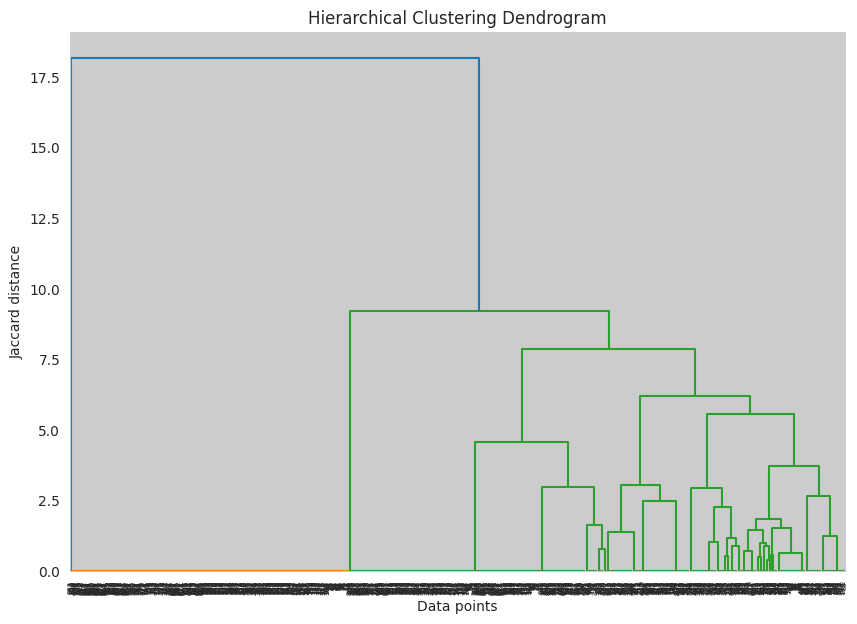

In [77]:
# Plot the dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()


In [78]:
from scipy.cluster.hierarchy import fcluster

In [79]:
# Example: Set maximum distance at 1.5 for cluster formation
cluster_labels = fcluster(linkage_matrix, t=5, criterion='distance')

# Add cluster labels back to your original DataFrame
data_new['cluster'] = cluster_labels

# Summary statistics for each cluster
cluster_summary = data_new[[feature_1, feature_2, feature_3, feature_4, feature_5, 'cluster']].groupby('cluster').agg(['mean', 'std', 'median', 'count'])
cluster_summary


exploitation                        events_maths                  \
                mean       std median count         mean      std median   
cluster                                                                    
1           0.000000  0.000000    0.0   348     0.000000  0.00000    0.0   
2           1.000000  0.000000    1.0   156     0.000000  0.00000    0.0   
3           0.506024  0.501476    1.0   166     0.072289  0.25975    0.0   
4           0.708738  0.456566    1.0   103     0.000000  0.00000    0.0   
5           0.477612  0.503268    0.0    67     0.000000  0.00000    0.0   
6           0.724409  0.448581    1.0   127     1.000000  0.00000    1.0   

              external_dependencies                         \
        count                  mean       std median count   
cluster                                                      
1         348              0.000000  0.000000    0.0   348   
2         156              0.000000  0.000000    0.0   156   
3         166              1.000000  0.000000    1.0   166   
4         103              0.427184  0.497088    0.0   103   
5          67              0.298507  0.461057    0.0    67   
6         127              0.480315  0.501591    0.0   127   

        reentrancy_without_eth_transfer                         \
                                   mean       std median count   
cluster                                                          
1                              0.000000  0.000000    0.0   348   
2                              0.000000  0.000000    0.0   156   
3                              0.000000  0.000000    0.0   166   
4                              1.000000  0.000000    1.0   103   
5                              0.358209  0.483093    0.0    67   
6                              0.496063  0.501965    0.0   127   

        immutable_states                         
                    mean       std median count  
cluster                                          
1               0.000000  0.000000    0.0   348  
2               0.000000  0.000000    0.0   156  
3               0.138554  0.346526    0.0   166  
4               0.000000  0.000000    0.0   103  
5               1.000000  0.000000    1.0    67  
6               0.433071  0.497463    0.0   127

In [80]:
# Plot histogram of cluster labels to see distribution of cluster sizes
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.show()

In [81]:
# Check the data types in cluster_centers
print(cluster_centers.dtypes)

# Convert all columns to numeric types if they are not already
cluster_centers = cluster_centers.apply(pd.to_numeric, errors='coerce')


exploitation                       float64
external_dependencies              float64
reentrancy_without_eth_transfer    float64
immutable_states                   float64
dtype: object


In [83]:
# Calculate the mean for each cluster and feature
cluster_centers = data_new[[feature_1,feature_2, feature_3, feature_4, feature_5 ,'cluster']].groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.show()
